In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

**Для начала загрузим файл в pd.DataFrame**

In [2]:
data = pd.read_csv("2020_rankings.csv")
print(data)

      rank_order   rank                                   name scores_overall  \
0             10      1                   University of Oxford           95.4   
1             20      2     California Institute of Technology           94.5   
2             30      3                University of Cambridge           94.4   
3             40      4                    Stanford University           94.3   
4             50      5  Massachusetts Institute of Technology           93.6   
...          ...    ...                                    ...            ...   
1392       13930  1001+                     Yuan Ze University      10.7–22.1   
1393       13940  1001+                     Zagazig University      10.7–22.1   
1394       13950  1001+                   University of Zagreb      10.7–22.1   
1395       13960  1001+                   University of Zanjan      10.7–22.1   
1396       13970  1001+      Zhejiang University of Technology      10.7–22.1   

      scores_overall_rank  

Можно предположить, что столбцы 'aliases' и 'subject_offered' будут наименее эффектинвы для дальнейшего исследования. Название 'aliases' практически всегда совпадает с основым названием ВУЗа, а список предметов будет трудно проанализировать. 

**Проанализируем столбцы и их типы данных**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1397 non-null   int64  
 1   rank                               1397 non-null   object 
 2   name                               1397 non-null   object 
 3   scores_overall                     1397 non-null   object 
 4   scores_overall_rank                1397 non-null   int64  
 5   scores_teaching                    1397 non-null   float64
 6   scores_teaching_rank               1397 non-null   int64  
 7   scores_research                    1397 non-null   float64
 8   scores_research_rank               1397 non-null   int64  
 9   scores_citations                   1397 non-null   float64
 10  scores_citations_rank              1397 non-null   int64  
 11  scores_industry_income             1397 non-null   float

Таблица состоит из 24 столбца с данными со следующими datatype: 'int64', 'object', 'float64', 'bool'. В каждом столбце имеется 1397 значений кроме 'stats_female_male_ratio', где в 66 строках имеются пропуски. Прежде чем перейти к проверке данного суждения, заметим, что последние два столбца состоят из переменной 'bool', проверим, если все значения одинковы и равны 'False', то в дальнейшем анализе эти столбцы не понадобятся.

In [4]:
if data['closed'].isin([True]).any():
    print("The column contains True")
else:
    print("The column does not contain True")

The column does not contain True


In [5]:
if data['unaccredited'].isin([True]).any():
    print("The column contains True")
else:
    print("The column does not contain True")

The column does not contain True


Столбцы 'closed' и 'unaccredited' также не несут в себе смысла, так как для всех ВУЗов значения одникаовые: они работают и аккредитированы. <br> *Код выше был найден с помощью ИИ*

**Проверим количество пропусков в каждой колонке**

In [6]:
data.isnull().sum()

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              66
aliases                               0
subjects_offered                      0
closed                                0
unaccredited                          0
dtype: int64

Предположение подвтердилось, что в столбце 'stats_female_male_ratio' 66 пропуска, так как значения данного столбца представляют собой пропурцию двух чисел (процентное соотношение девушек к мужчинам), просто заполнить медианой пропуски не получится (тип переменной - object). Попробуем оставить в этом столбце лишь первые два символа, то есть число процентов учащихся девушек в каждом ВУЗе. Заменим столбез с данными 'stats_female_male_ratio' на 'stats_female_ratio'.

In [7]:
data['stats_female_male_ratio'] = data['stats_female_male_ratio'].str[:2]
data = data.rename(columns={'stats_female_male_ratio': 'stats_female_ratio'})

data.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,...,22,United Kingdom,"20,665",11.2,41%,46,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,...,151,United States,"2,240",6.4,30%,34,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,...,37,United Kingdom,"18,980",10.9,37%,47,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,...,188,United States,"16,135",7.3,23%,43,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,...,99,United States,"11,247",8.6,34%,39,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


Теперь заполним пропуски медианой, так как это среднее по численности в упорядочном списке, а не просто среднее арифметическое, что может исказить данные.

In [8]:
data.fillna(data.median(), inplace=True)

In [9]:
data.isnull().sum()
#Ещё одна проверка показала, что мы избавились от нулевых значений.

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
stats_female_ratio                   0
aliases                              0
subjects_offered                     0
closed                               0
unaccredited                         0
dtype: int64

Теперь определим, какие столбцы будут присутсвовать в дальнейшем исследовании.

In [10]:
useful_cols = ['rank_order', 'rank', 'name', 'scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'location', 'stats_number_students', 'stats_female_ratio']
data[useful_cols]

,rank_order,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_female_ratio
0,10,1,University of Oxford,95.4,90.5,99.6,98.4,65.5,96.4,United Kingdom,"20,665",46
1,20,2,California Institute of Technology,94.5,92.1,97.2,97.9,88.0,82.5,United States,"2,240",34
2,30,3,University of Cambridge,94.4,91.4,98.7,95.8,59.3,95.0,United Kingdom,"18,980",47
3,40,4,Stanford University,94.3,92.8,96.4,99.9,66.2,79.5,United States,"16,135",43
4,50,5,Massachusetts Institute of Technology,93.6,90.5,92.4,99.5,86.9,89.0,United States,"11,247",39
...,...,...,...,...,...,...,...,...,...,...,...,...
1392,13930,1001+,Yuan Ze University,10.7–22.1,17.3,13.9,15.5,47.0,28.3,Taiwan,"8,356",42
1393,13940,1001+,Zagazig University,10.7–22.1,13.6,7.7,29.6,34.4,38.8,Egypt,"156,419",53
1394,13950,1001+,University of Zagreb,10.7–22.1,17.8,12.9,25.3,37.4,33.0,Croatia,"68,216",59
1395,13960,1001+,University of Zanjan,10.7–22.1,17.0,12.3,28.5,43.8,18.7,Iran,"9,980",54


Проверим ВУЗы какой страны чаще всего встречаются в этом рейтинге. 

In [11]:
#Код найден с помощью ИИ, запрос был следующим:Как в Python найти какое значение в столбце чаще всего встречается?

value_counts = data['location'].value_counts()
most_common_value = value_counts.index[0]
print(most_common_value)

United States


Теперь изучим, какое минимальное и максимальное показателя дохода отрасли по инновации.

In [14]:
# Максимальное значение в столбце
print(data['scores_industry_income'].max())

# Минимальное значение в столбце
print(data['scores_industry_income'].min())

100.0
34.4


In [32]:
print(data['scores_international_outlook'].max())
print(data['scores_international_outlook'].min())
print(data['scores_international_outlook'].mean())
print(data['scores_international_outlook'].median())

99.7
13.1
47.09892627057979
43.1


Text(0, 0.5, 'количество вузов')

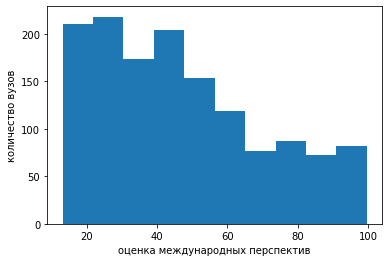

In [35]:
plt.hist(data['scores_international_outlook'])
plt.xlabel('оценка международных перспектив')
plt.ylabel('количество вузов')

На графике видно, что чаще всего оценка международных перспектив у высших заведений ниже среднего, это подтверждает и поиск медианы чуть выше.

In [27]:
data['stats_female_ratio'] = data['stats_female_ratio'].astype('float64')

print(data.dtypes)

#Код найден с помощью ИИ, запрс: Как изменить тип данных object на float64

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
location                              object
stats_number_students                 object
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_ratio                   float64
aliases                               object
subjects_offered                      object
closed    

Text(0, 0.5, 'количество вузов')

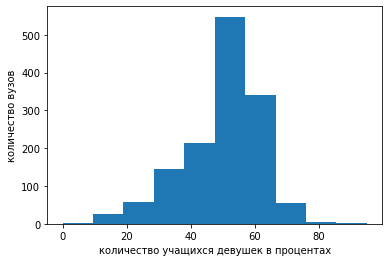

In [36]:
plt.hist(data['stats_female_ratio'])
plt.xlabel('количество учащихся девушек в процентах')
plt.ylabel('количество вузов')

График выше иллюстрирует, что в основном количество девушек равняется или превышает количество учащихся парней. 

Text(0, 0.5, 'количество вузов')

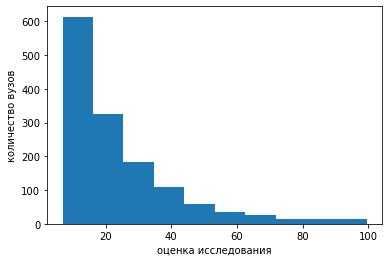

In [37]:
plt.hist(data['scores_research'])
plt.xlabel('оценка исследования')
plt.ylabel('количество вузов')

Text(0, 0.5, 'количество вузов')

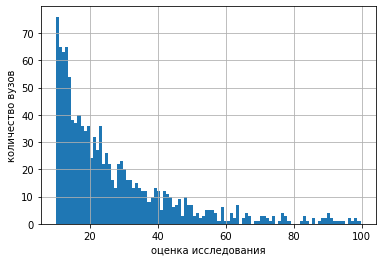

In [39]:
data[data.scores_research > 10].scores_research.hist(bins=100)
plt.xlabel('оценка исследования')
plt.ylabel('количество вузов')

На сайте приведено следующее объяснение данной переменной 'scores_research': объем, индекс и репутация университета. На графике как раз видно, что подавлящее большинство университетов имеют низкую оценку (ниже 50) => можно сделать вывод, что высокая оценка исследования свойственна топовым университетам.

**Предварительные гипотезы, которые будут проверяться в дальнейшем:**
1) Проверить гипотезу, что количество учащихся девушек никак не влияет на место в рейтинге.
<br> 2) Проверить гипотезу, что оценка международных перспектив никак не влияет на место в рейтинге. <br> 3) Проверить гипотезу, чем выше 'scores_research', тем выше место университета в рейтинге.

**Машинное обучение**

Попробуем предсказать оценку преподавания. 'scores_teaching' будет целевой переменной, остальные - объясняющими. В дальнейшем нужно будет изучить связь объясняемой переменной с объясняющими, найти корреляцию. В дальнейшем для обучения модели разобъём выборку на обучающую и тестовую.